In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from GaussianCopulaImp.expectation_maximization import ExpectationMaximization

In [2]:
from helpers import generate_sigma, generate_mixed_from_gc, mask_types, get_smae, get_scaled_error, get_smae_batch

In [3]:
from streaming_copula_generated import run_onerep

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
seed = 1
n = 2000
var_types = {'cont':list(range(5)), 'ord':list(range(5, 10)), 'bin':list(range(10, 15))}

## Nonstationary streaming data 

In [5]:
sigma = [generate_sigma(seed+i, p=sum([len(value) for value in var_types.values()])) for i in range(3)]
X = generate_mixed_from_gc(sigma=sigma, n=n, seed=seed)
X_masked = mask_types(X, mask_num=2, seed=seed)

In [6]:
p = sum([len(val) for val in var_types.values()])
cont_indices = np.zeros(p)
cont_indices[var_types['cont']] = 1
var_types_input = {'cont':cont_indices==1, 'ord':cont_indices==0}

In [7]:
em = ExpectationMaximization(var_types = var_types_input)

In [8]:
out = em.impute_missing_online(X=X_masked, 
                               batch_size=40, 
                               const_decay = 0.5,
                               max_workers=4)
X_imp_online, copula_corr_change = out['imputed_data'], out['copula_corr_change']

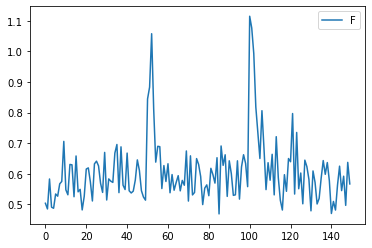

In [11]:
pd.DataFrame(copula_corr_change).plot()

In [7]:
r1 = run_onerep(seed = 1)
r2 = run_onerep(seed = 2)

Baseline imputation achieves zero imputation error in variable 11.There are 15 imputed entries, ranging from 1.0 (min) to 1.0 (max).
Baseline imputation achieves zero imputation error in variable 11.There are 15 imputed entries, ranging from 1.0 (min) to 1.0 (max).


In [12]:
from collections import defaultdict
output_all = defaultdict(list)

In [13]:
for r in [r1,r2]:
    output = r
    for name,value in output.items():
        output_all[name].append(value)

In [14]:
output_all['copula_corr_change'] = sum(output_all['copula_corr_change'])/2
output_all['smae_online'] = sum(output_all['smae_online'])/2
output_all['smae_offline'] = sum(output_all['smae_offline'])/2

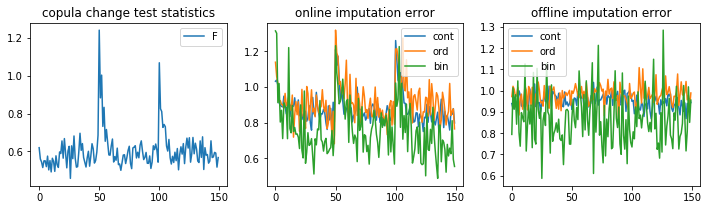

In [15]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
output_all['copula_corr_change'].plot(ax=ax[0], title='copula change test statistics')
output_all['smae_online'].plot(ax=ax[1], title='online imputation error')
output_all['smae_offline'].plot(ax=ax[2], title='offline imputation error')

In [23]:
for i in tqdm(range(1, NUM_STEPS + 1)):
		output = run_onerep(seed=i, n=n, 
							batch_size=batch_size, batch_c=batch_c, max_iter=max_iter, const_decay=const_decay,
							num_ord_updates=num_ord_updates, threshold=threshold, max_workers=max_workers, 
							var_types=var_types, MASK_NUM=MASK_NUM, cutoff_by=cutoff_by)
		for name, value in output.items():
			output_all[name].append(value)

(150, 3)

In [9]:
r1['copula_corr_change'].isnull().sum()

F    0
dtype: int64

In [10]:
r1['smae_online'].isnull().sum(axis=0)

cont    0
ord     0
bin     0
dtype: int64

In [11]:
r2['smae_online'].isnull().sum(axis=0)

cont    0
ord     0
bin     0
dtype: int64

In [22]:
(r1['smae_online']+r2['smae_online']).isnull().sum(axis=0)

cont    0
ord     0
bin     1
dtype: int64

In [50]:
def batch_iterable(X, batch_size=40):
    n = X.shape[0]
    start = 0
    while start < n:
        end = min(start + batch_size, n)
        yield X[start:end]
        start = end

def get_smae_batch(x_imp, x_true, x_obs, 
                   batch_size = 40,
                   baseline=None, per_type=False, var_types = {'cont':list(range(5)), 'ord':list(range(5, 10)), 'bin':list(range(10, 15))}):
    result = []
    baseline = np.nanmedian(x_obs,0) if baseline is None else baseline
    for imp, true, obs in zip(batch_iterable(x_imp,batch_size), batch_iterable(x_true,batch_size), batch_iterable(x_obs,batch_size)):
        scaled_diffs = get_smae(imp, true, obs, baseline=baseline, per_type=False)
        result.append(scaled_diffs)
    result = np.array(result)

    if per_type:
        scaled_diffs = {}
        for name, val in var_types.items():
            scaled_diffs[name] = result[:,val].mean(axis=1)
    else:
        scaled_diffs = result

    return scaled_diffs

In [36]:
x = list(batch_iterable(X_imp_online, batch_size=10))

In [38]:
x[0].shape

(6000, 15)

In [35]:
for x in batch_iterable(X_imp_online, batch_size=10):
    print(x.shape)

(6000, 15)


In [51]:
r = get_smae_batch(X_imp_online, X, X_masked, batch_size=40, per_type=True)

In [57]:
r = pd.DataFrame(r)

In [60]:
r1 = r.copy()

In [70]:
c1=copula_corr_change

In [71]:
c1

defaultdict(list,
            {'F': [0.5032014020139034,
              0.4847054109386784,
              0.582725338114429,
              0.4904708234842411,
              0.48691548765893466,
              0.5336118650582805,
              0.5263885653917811,
              0.5668050400234245,
              0.5746608751861381,
              0.7057665660491896,
              0.5473882774431094,
              0.5310304492673827,
              0.6303242550767513,
              0.6290662377424588,
              0.5246123338035377,
              0.6580257493242037,
              0.5407200075887382,
              0.5487504559709241,
              0.48149023289569004,
              0.526134706019336,
              0.6153470628490123,
              0.6189921309227947,
              0.57339738069591,
              0.5107464933682148,
              0.6321482211771212,
              0.641097498799653,
              0.6257056113144921,
              0.5685308213873628,
              0.538742087447

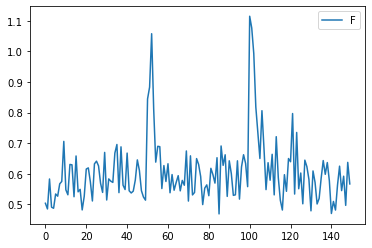

In [69]:
pd.DataFrame(copula_corr_change).plot()

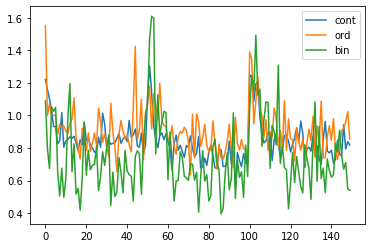

In [54]:
pd.DataFrame(r).plot()

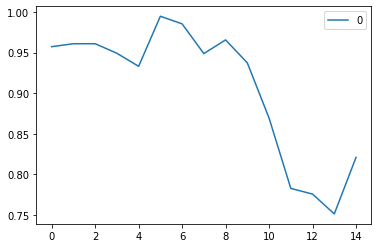

In [7]:
pd.DataFrame(r1['smae_offline'].flatten()).plot()

In [72]:
a=b=1

In [73]:
f'a{a}'f'b{b}'

'a1b1'